### Daily versus 3-hourly CESM2 wind speed forcing

In [2]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.utils import fix_lon_range

In [3]:
base   = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
dir3h  = f'{base}climate-forcing/CESM2/LE2/raw_3h/'
dir1da = f'{base}climate-forcing/CESM2/LE2/raw/'
dir1db = f'{base}climate-forcing/CESM2/LE2/processed/'

In [45]:
year=1979
month=1

ds_1d_U10x = xr.open_dataset(f'{dir1db}CESM2-LE2_ens1011.001_U10x_y{year}.nc').U10x.sel(lat=slice(-80,-50))
ds_1d_U10y = xr.open_dataset(f'{dir1db}CESM2-LE2_ens1011.001_U10y_y{year}.nc').U10y.sel(lat=slice(-80,-50))
ds_1d_UBOT = xr.open_dataset(f'{dir1da}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.UBOT.19700101-19791231.nc').UBOT.sel(lat=slice(-80,-50))
ds_1d_VBOT = xr.open_dataset(f'{dir1da}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.VBOT.19700101-19791231.nc').VBOT.sel(lat=slice(-80,-50))
ds_3h_UBOT = xr.open_dataset(f'{dir3h}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h3.UBOT.1970010100-1980010100.nc').UBOT.sel(lat=slice(-80,-50))
ds_3h_VBOT = xr.open_dataset(f'{dir3h}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h3.VBOT.1970010100-1980010100.nc').VBOT.sel(lat=slice(-80,-50))
ds_3h_UBOT['lon'] = fix_lon_range(ds_3h_UBOT['lon'])
ds_3h_VBOT['lon'] = fix_lon_range(ds_3h_VBOT['lon'])
ds_1d_UBOT['lon'] = fix_lon_range(ds_1d_UBOT['lon'])
ds_1d_VBOT['lon'] = fix_lon_range(ds_1d_VBOT['lon'])

ds_1d_U10x = ds_1d_U10x.isel(time=(ds_1d_U10x.time.dt.month==month)).sortby('lon')
ds_1d_U10y = ds_1d_U10y.isel(time=(ds_1d_U10y.time.dt.month==month)).sortby('lon')
ds_1d_UBOT = ds_1d_UBOT.isel(time=(ds_1d_UBOT.time.dt.year==year)*(ds_1d_UBOT.time.dt.month==month)).sortby('lon')
ds_1d_VBOT = ds_1d_VBOT.isel(time=(ds_1d_VBOT.time.dt.year==year)*(ds_1d_VBOT.time.dt.month==month)).sortby('lon')
ds_3h_UBOT = ds_3h_UBOT.isel(time=(ds_3h_UBOT.time.dt.year==year)*(ds_3h_UBOT.time.dt.month==month)).sortby('lon')
ds_3h_VBOT = ds_3h_VBOT.isel(time=(ds_3h_VBOT.time.dt.year==year)*(ds_3h_VBOT.time.dt.month==month)).sortby('lon')

ds_3h_UBOT['speed'] = np.sqrt(ds_3h_UBOT**2 + ds_3h_VBOT**2)
ds_1d_UBOT['speed'] = np.sqrt(ds_1d_UBOT**2 + ds_1d_VBOT**2)
ds_1d_U10x['speed'] = np.sqrt(ds_1d_U10x**2 + ds_1d_U10y**2)

Text(0.5, 1.0, 'BOT - U10')

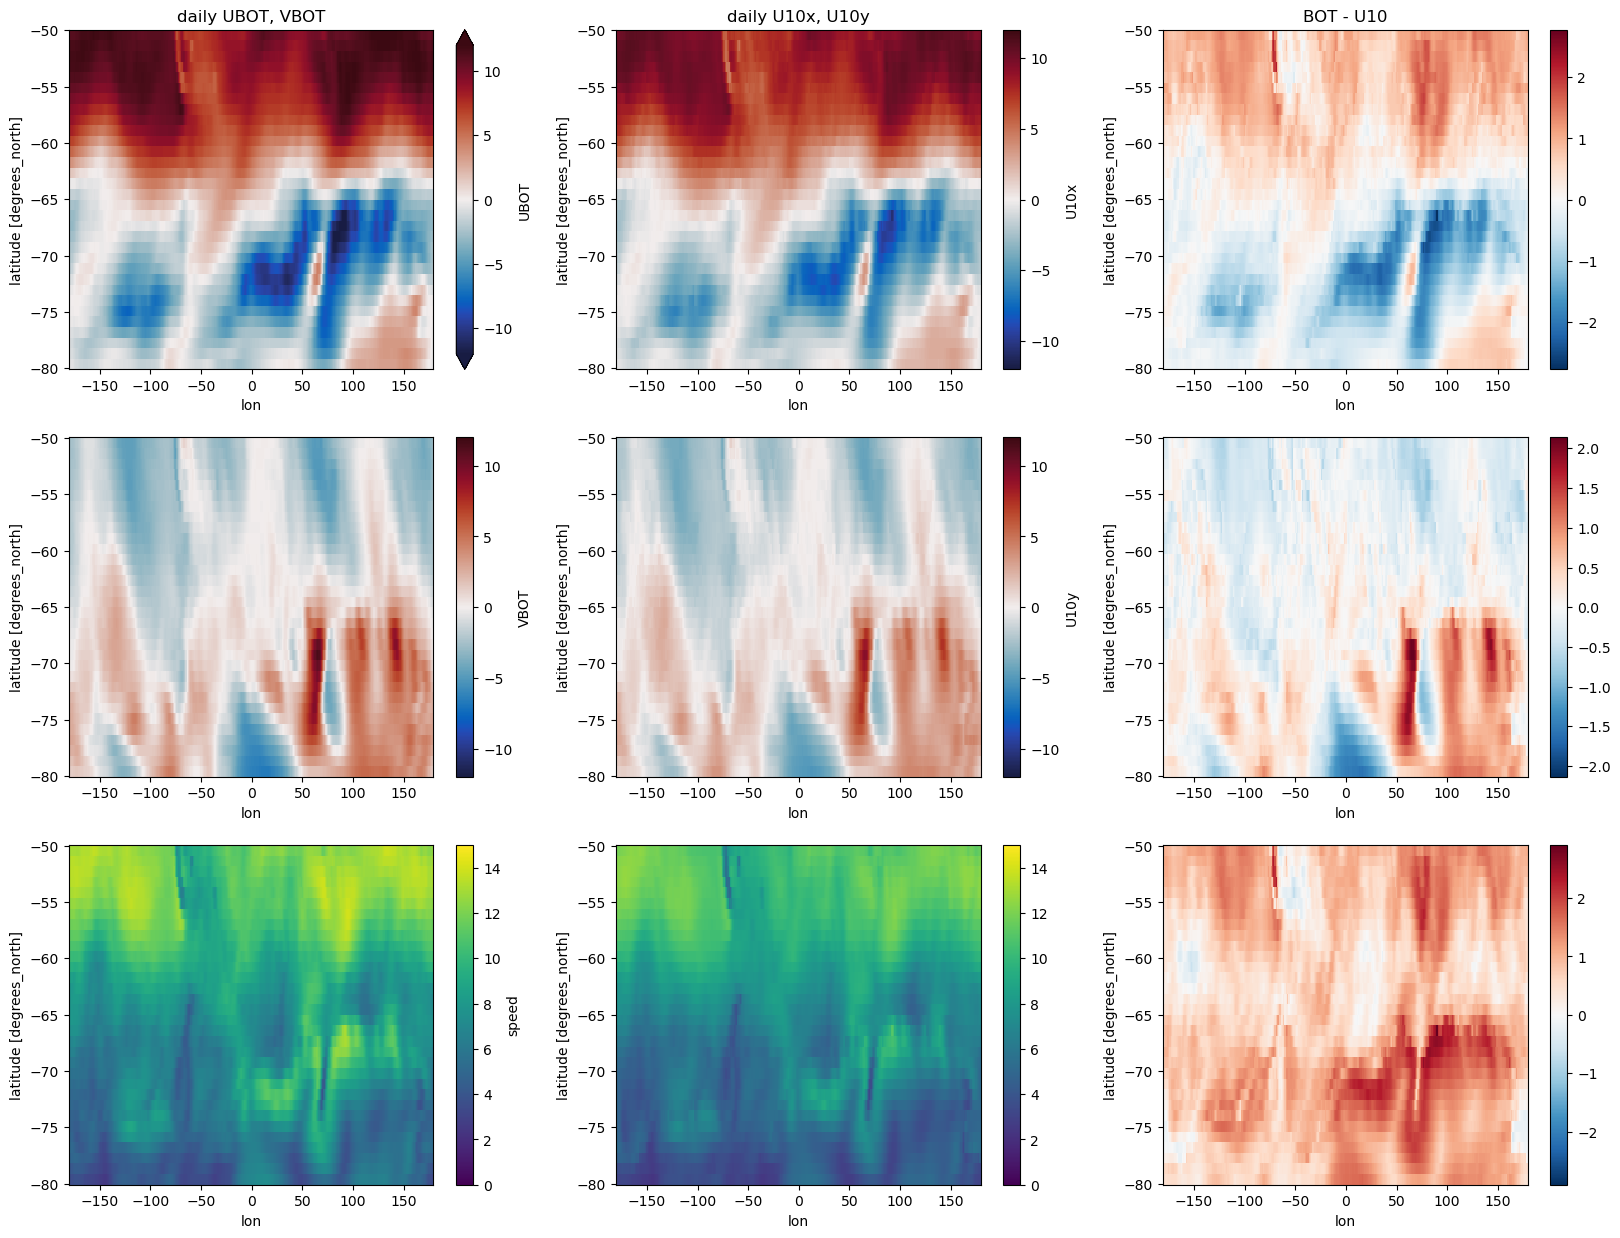

In [47]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
kwags1 = {'vmin':-12, 'vmax':12, 'cmap':cmocean.cm.balance}
kwags2 = {'vmin':0, 'vmax':15, 'cmap':cmocean.cm.balance}

ds_1d_UBOT.mean(dim='time').plot(ax=ax[0,0], **kwags1)
ds_1d_U10x.mean(dim='time').plot(ax=ax[0,1], **kwags1)
(ds_1d_UBOT.mean(dim='time') - ds_1d_U10x.mean(dim='time')).plot(ax=ax[0,2])

ds_1d_VBOT.mean(dim='time').plot(ax=ax[1,0], **kwags1)
ds_1d_U10y.mean(dim='time').plot(ax=ax[1,1], **kwags1)
(ds_1d_VBOT.mean(dim='time') - ds_1d_U10y.mean(dim='time')).plot(ax=ax[1,2])

ds_1d_UBOT['speed'].mean(dim='time').plot(ax=ax[2,0], vmin=0, vmax=15)
np.sqrt(ds_1d_U10y**2 + ds_1d_U10x**2).mean(dim='time').plot(ax=ax[2,1], vmin=0, vmax=15)
(ds_1d_UBOT['speed'].mean(dim='time') - np.sqrt(ds_1d_U10y**2 + ds_1d_U10x**2).mean(dim='time')).plot(ax=ax[2,2])

ax[0,0].set_title('daily UBOT, VBOT')
ax[0,1].set_title('daily U10x, U10y')
ax[0,2].set_title('BOT - U10')

In [30]:
# load some ERA5 results as well:
ds_1h_era5 = xr.open_dataset(f'{base}ERA5-forcing/hourly/ERA5_1h_windspeed_y{year}m{month:02}_mean.nc').sel(latitude=slice(-80,-50))

Text(0.5, 1.0, '3-hourly - daily')

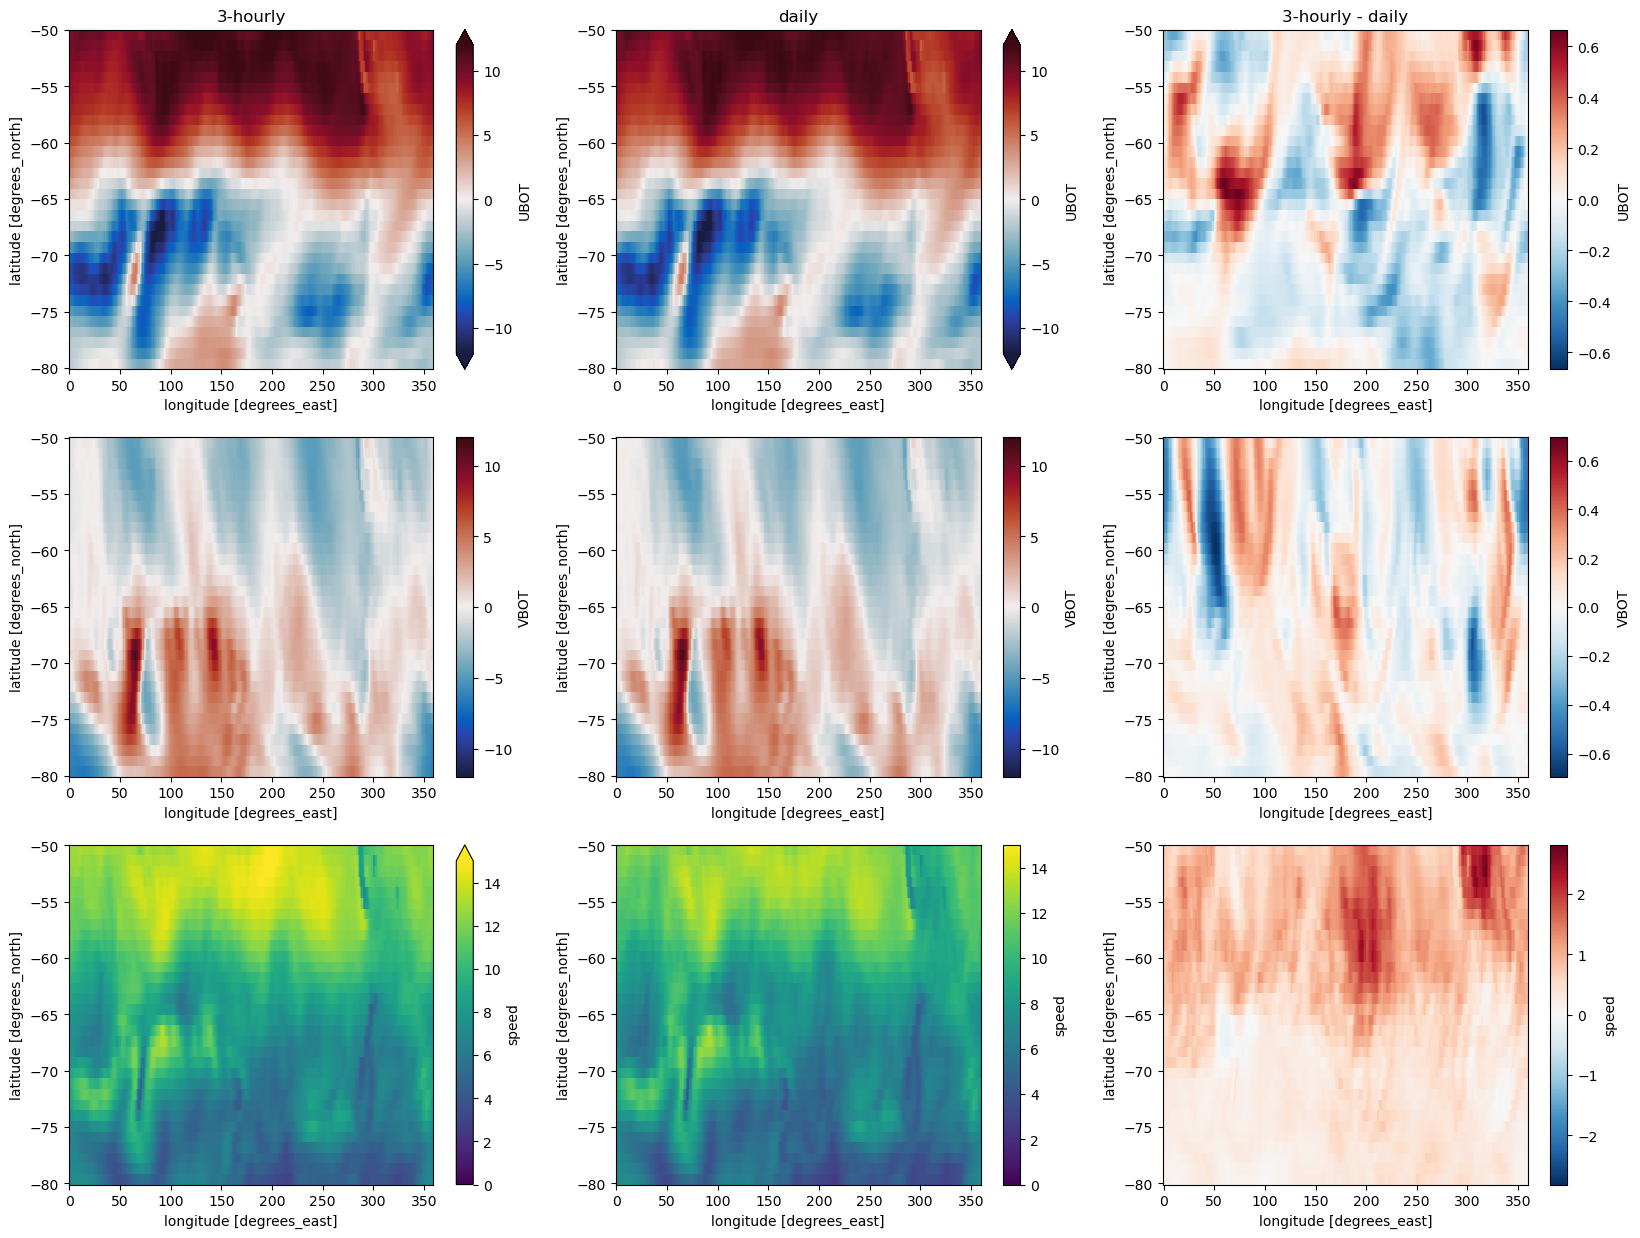

In [36]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
kwags1 = {'vmin':-12, 'vmax':12, 'cmap':cmocean.cm.balance}
kwags2 = {'vmin':0, 'vmax':15, 'cmap':cmocean.cm.balance}

ds_3h_UBOT.mean(dim='time').plot(ax=ax[0,0], **kwags1)
ds_1d_UBOT.mean(dim='time').plot(ax=ax[0,1], **kwags1)
(ds_3h_UBOT.mean(dim='time') - ds_1d_UBOT.mean(dim='time')).plot(ax=ax[0,2])

ds_3h_VBOT.mean(dim='time').plot(ax=ax[1,0], **kwags1)
ds_1d_VBOT.mean(dim='time').plot(ax=ax[1,1], **kwags1)
(ds_3h_VBOT.mean(dim='time') - ds_1d_VBOT.mean(dim='time')).plot(ax=ax[1,2])

ds_3h_UBOT['speed'].mean(dim='time').plot(ax=ax[2,0], vmin=0, vmax=15)
ds_1d_UBOT['speed'].mean(dim='time').plot(ax=ax[2,1], vmin=0, vmax=15)
# ds_1h_era5.wind_speed.plot(ax=ax[2,1], vmin=0, vmax=15)
(ds_3h_UBOT['speed'].mean(dim='time') - ds_1d_UBOT['speed'].mean(dim='time')).plot(ax=ax[2,2])

ax[0,0].set_title('3-hourly')
ax[0,1].set_title('daily')
ax[0,2].set_title('3-hourly - daily')

In [11]:
mask = xr.open_dataset(f'{dirf1h}../ERA5-landmask.nc').isel(time=0).sel(latitude=slice(-50,-80)).lsm
mask['longitude'] = fix_lon_range(mask['longitude'])

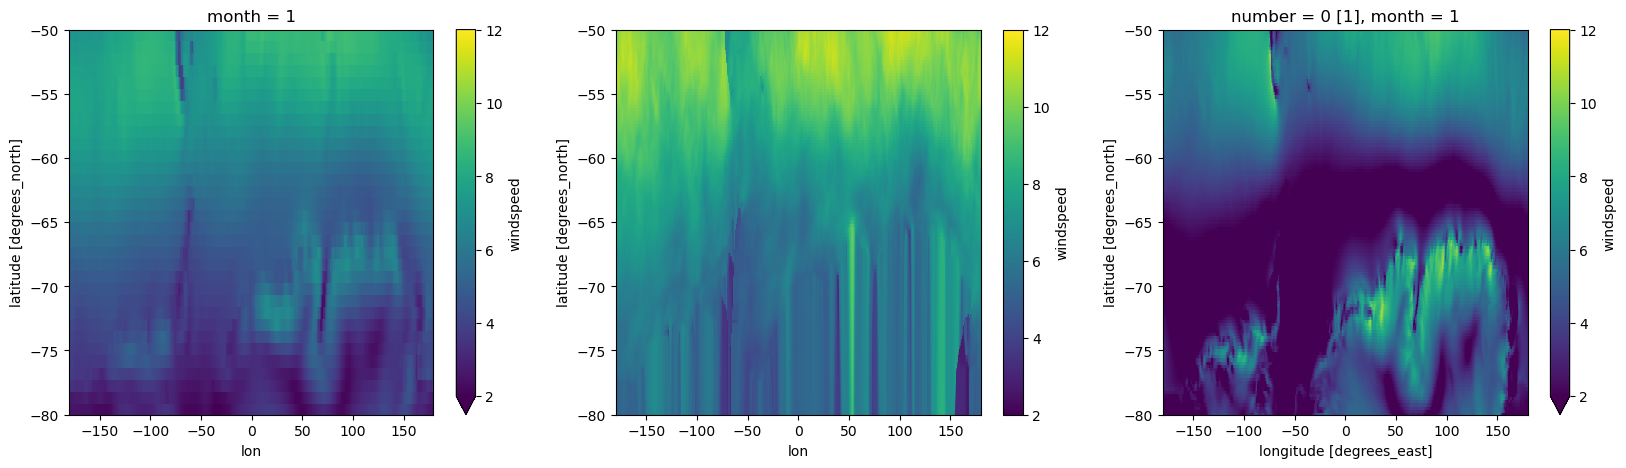

In [48]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

kwags={'vmin':2,'vmax':12,'ylim':(-80,-50)}

cesm2_speed_monthly.isel(month=0).windspeed.sortby('lon').plot(ax=ax[0], **kwags)
era5_speed_monthly.windspeed.sortby('lon').plot(ax=ax[1], **kwags)
era5_speed_monthly2.windspeed.isel(month=0).sortby('lon').plot(ax=ax[2], **kwags)